# Context

### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Feature Descriptions

### 1) id: unique identifier
### 2) gender: "Male", "Female" or "Other"
### 3) age: age of the patient
### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
### 6) ever_married: "No" or "Yes"
### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
### 8) Residence_type: "Rural" or "Urban"
### 9) avg_glucose_level: average glucose level in blood
### 10) bmi: body mass index
### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
### 12) stroke: 1 if the patient had a stroke or 0 if not

## Objective

### The dataset likely aims to:

### *Analyze risk factors associated with stroke.

### *Predict the likelihood of an individual having a stroke based on demographic, health, and lifestyle factors.

### *Assist in healthcare planning and interventions for stroke prevention. 

### Data Collection

In [229]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [230]:
# Load the dataset
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [231]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [232]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [233]:
stroke_data.shape

(5110, 12)

In [234]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [235]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [236]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Cleaning/ Preprocessing

In [238]:
# Check for null values
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### There is null values in bmi column

In [240]:
# Impute missing BMI values with the median
bmi_median = stroke_data['bmi'].median()
stroke_data['bmi'].fillna(bmi_median, inplace=True)

In [241]:
# Verify missing values are handled
print(stroke_data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Null value is removed

In [243]:
# Check for duplicates
stroke_data.duplicated().sum()

0

### There is no duplicate values

In [245]:
num=stroke_data.select_dtypes(include='number')
num

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.1,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [246]:
num.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

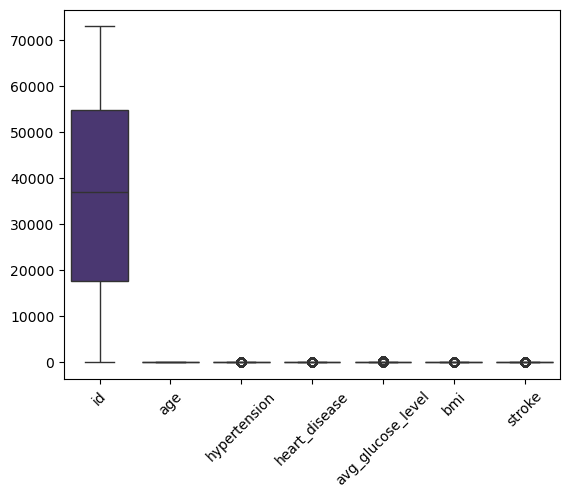

In [247]:
sns.boxplot(data=stroke_data,palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [248]:
numerical_features = ['hypertension','heart_disease','avg_glucose_level' ]
for i in numerical_features:
    iqr=stroke_data[i].quantile(0.75)-stroke_data[i].quantile(0.25)
    lower=stroke_data[i].quantile(0.025)-(1.5*iqr)
    upper=stroke_data[i].quantile(0.075)+(1.5*iqr)
    stroke_data[i]=pd.DataFrame(np.where(stroke_data[i]>upper,upper,np.where(stroke_data[i]<lower,lower,stroke_data[i])))


In [249]:
q1=stroke_data['bmi'].quantile(0.25)
q3=stroke_data['bmi'].quantile(0.75)
iqr3=q3-q1
lower3=q1-(1.5*iqr3)
upper3=q3+(1.5*iqr3)

stroke_data['bmi'] = np.clip(stroke_data['bmi'], lower3, upper3)

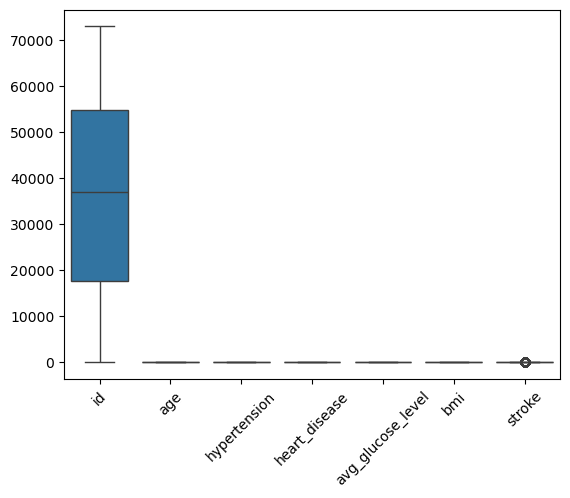

In [250]:
sns.boxplot(data=stroke_data)
plt.xticks(rotation=45)
plt.show()

In [251]:
stroke_data.shape

(5110, 12)

## Exploratory Data Analysis (EDA)

## Gender Analysis

In [254]:
gender_count=stroke_data['gender'].value_counts()
gender_percent=stroke_data['gender'].value_counts(normalize=True)*100
freq_table1=pd.DataFrame({'Count':gender_count,'Percentage %':gender_percent})
freq_table1

,Count,Percentage %
gender,,
Female,2994,58.590998
Male,2115,41.389432
Other,1,0.019569


In [255]:
stroke_data.drop(index=stroke_data.loc[stroke_data['gender'] =='Other'].index,inplace=True)

In [256]:
gender_count=stroke_data['gender'].value_counts()
gender_percent=stroke_data['gender'].value_counts(normalize=True)*100
freq_table1=pd.DataFrame({'Count':gender_count,'Percentage %':gender_percent})
freq_table1

,Count,Percentage %
gender,,
Female,2994,58.602466
Male,2115,41.397534


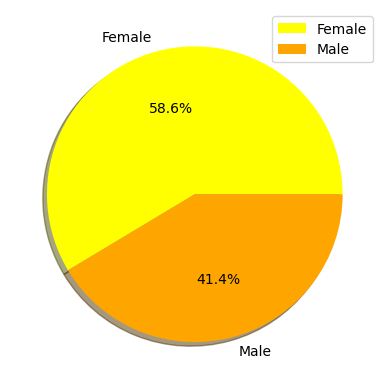

In [257]:
plt.pie(stroke_data['gender'].value_counts(),labels=['Female','Male'],colors=['yellow','orange'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

### Females are more than males

### Age Analysis

In [260]:
stroke_data['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

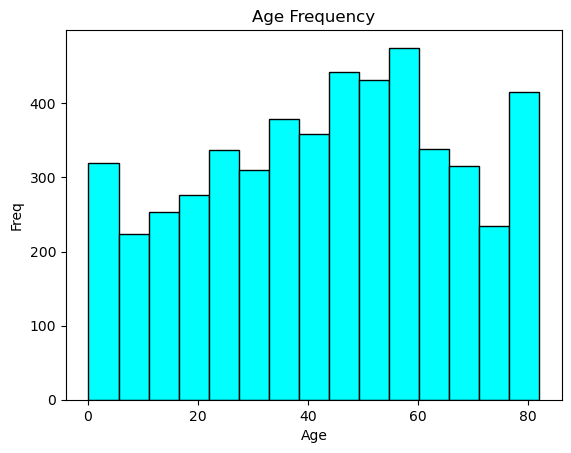

In [261]:
plt.hist(stroke_data['age'],bins=15,color='cyan',edgecolor='black',linewidth=1)
plt.title('Age Frequency')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

In [262]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   float64
 4   heart_disease      5109 non-null   float64
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 518.9+ KB


### Hyper Tension Analysis

In [264]:
hyperTension_count=stroke_data['hypertension'].value_counts()
hyperTension_percent=stroke_data['hypertension'].value_counts(normalize=True)*100
freq_table2=pd.DataFrame({'Count':hyperTension_count,'Percentage %':hyperTension_percent})
freq_table2

,Count,Percentage %
hypertension,,
0.0,5109,100.0


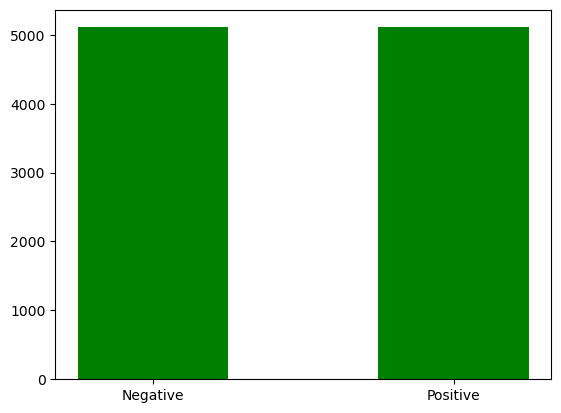

In [265]:
plt.bar(['Negative','Positive'],stroke_data['hypertension'].value_counts(),align='center',width=0.5,color=['green','green'])
plt.show()

### only few people have hypertension.

### Heart Disease Analysis

In [268]:
heartDisease_count=stroke_data['heart_disease'].value_counts()
heartDisease_percent=stroke_data['heart_disease'].value_counts(normalize=True)*100
freq_table6=pd.DataFrame({'Count':heartDisease_count,'Percantage %':heartDisease_percent})
freq_table6

,Count,Percantage %
heart_disease,,
0.0,5109,100.0


In [269]:
stroke_data['heart_disease'].value_counts()

heart_disease
0.0    5109
Name: count, dtype: int64

### Most of the people don't suffer from Heart Disease

### Marriage Analysis

In [272]:
stroke_data[['ever_married']]

,ever_married
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
5105,Yes
5106,Yes
5107,Yes
5108,Yes


In [273]:
married_count=stroke_data['ever_married'].value_counts()
married_percent=stroke_data['ever_married'].value_counts(normalize=True)*100
freq_table3=pd.DataFrame({'Count':married_count,'Percentage %':married_percent})
freq_table3

,Count,Percentage %
ever_married,,
Yes,3353,65.629282
No,1756,34.370718


<Axes: xlabel='ever_married', ylabel='count'>

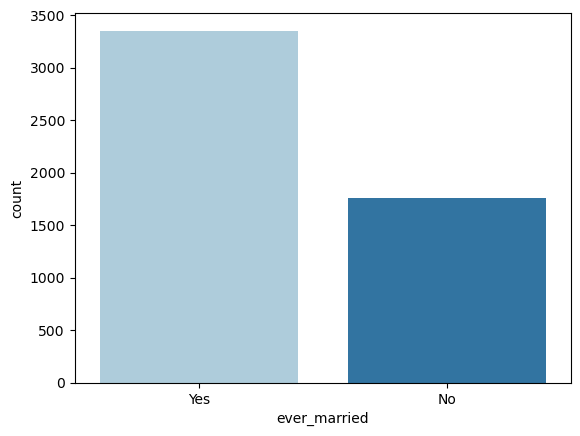

In [274]:
sns.countplot(x='ever_married',palette=sns.color_palette("Paired"),data=stroke_data)

### Married people are more

### Work Type Analysis

In [277]:
job_count=stroke_data['work_type'].value_counts()
job_percent=stroke_data['work_type'].value_counts(normalize=True)*100
freq_table4=pd.DataFrame({'Count':job_count,'Percentage %':job_percent})
freq_table4

,Count,Percentage %
work_type,,
Private,2924,57.232335
Self-employed,819,16.030534
children,687,13.446858
Govt_job,657,12.859659
Never_worked,22,0.430613


<Axes: xlabel='work_type', ylabel='count'>

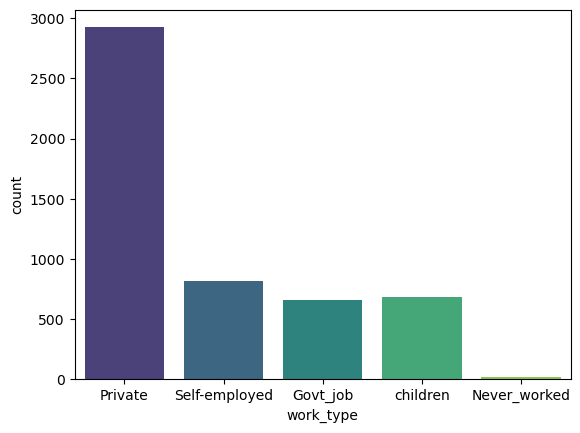

In [278]:
sns.countplot(x='work_type',palette='viridis',data=stroke_data)

### Private workers are more

### Residence Type Analysis

In [281]:
stroke_data[['Residence_type']]

,Residence_type
0,Urban
1,Rural
2,Rural
3,Urban
4,Rural
...,...
5105,Urban
5106,Urban
5107,Rural
5108,Rural


In [282]:
Residence_type_count=stroke_data['Residence_type'].value_counts()
Residence_type_percent=stroke_data['Residence_type'].value_counts(normalize=True)*100
freq_table5=pd.DataFrame({'Count':Residence_type_count,'Percentage %':Residence_type_percent})
freq_table5

,Count,Percentage %
Residence_type,,
Urban,2596,50.812292
Rural,2513,49.187708


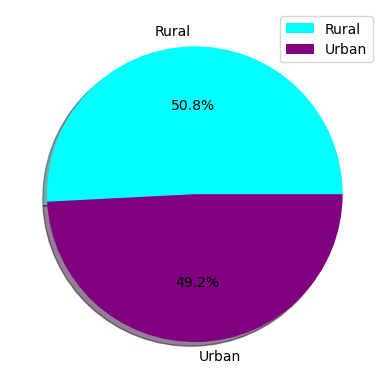

In [283]:
plt.pie(stroke_data['Residence_type'].value_counts(),labels=['Rural','Urban'],colors=['cyan','purple'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

### These have only a small difference

### Average Glucose Level Analysis

In [286]:
stroke_data['avg_glucose_level'].describe()

count    5109.000000
mean       92.982524
std        19.717722
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       118.764500
Name: avg_glucose_level, dtype: float64

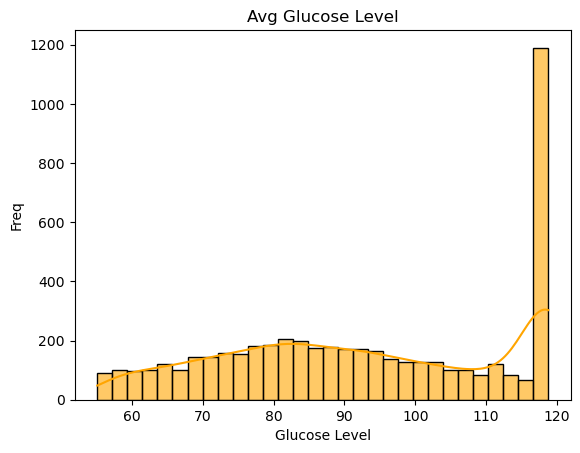

In [287]:
sns.histplot(stroke_data['avg_glucose_level'],bins=30,kde=True,color='orange',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('Avg Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Freq')
plt.show()

### The normal fasting blood glucose level (measured after not eating for at least 8 hours) is:
### * Normal Range: 70 to 100 mg/dL (3.9 to 5.6 mmol/L) #### If the fasting blood glucose level is outside this range:
### * Prediabetes: 100 to 125 mg/dL (5.6 to 6.9 mmol/L)
### * Diabetes: 126 mg/dL (7.0 mmol/L) or higher on two separate tests

### Body Mass Index Analysis(bmi)

In [290]:
stroke_data['bmi'].describe()

count    5109.000000
mean       28.691642
std         7.121011
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        46.300000
Name: bmi, dtype: float64

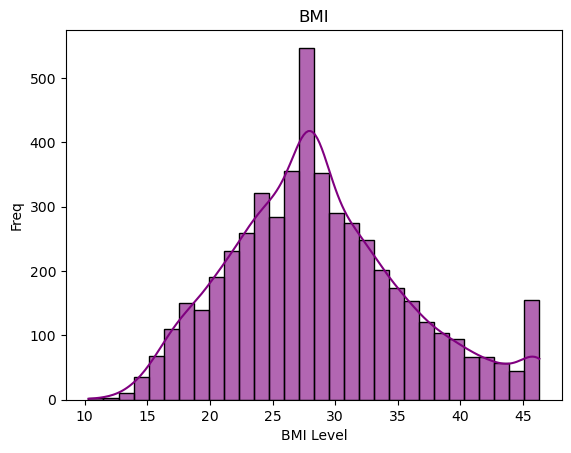

In [291]:
sns.histplot(stroke_data['bmi'],bins=30,kde=True,color='purple',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('BMI')
plt.xlabel('BMI Level')
plt.ylabel('Freq')
plt.show()

### BMI Categories
### Underweight: BMI less than 18.5
### Normal weight: BMI 18.5 to 24.9
### Overweight: BMI 25 to 29.9
### Obesity: BMI 30 or higher

### Stroke Prediction Analysis

In [294]:
stroke_count=stroke_data['stroke'].value_counts()
stroke_percent=stroke_data['stroke'].value_counts(normalize=True)*100
freq_table7=pd.DataFrame({'Count':stroke_count,'Percentage %':stroke_percent})
freq_table7

,Count,Percentage %
stroke,,
0,4860,95.126248
1,249,4.873752


### Most of the people don't suffer a stroke.

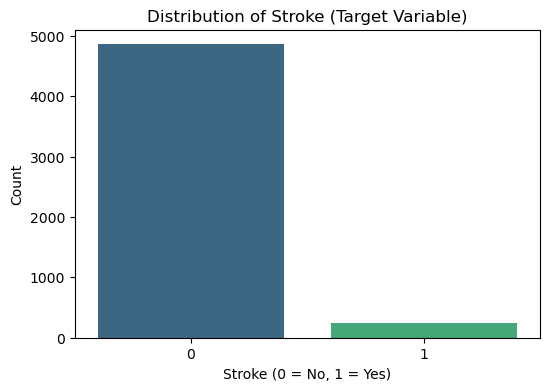

In [296]:
# Distribution of target variable (stroke)
plt.figure(figsize=(6, 4))
sns.countplot(data=stroke_data, x='stroke', palette='viridis')
plt.title('Distribution of Stroke (Target Variable)')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


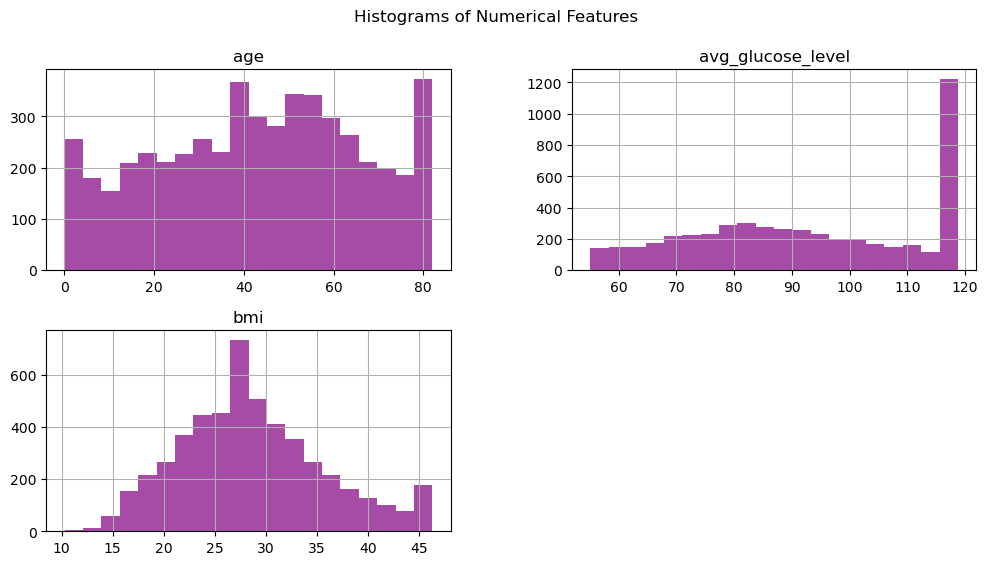

In [297]:
# Distribution of numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
stroke_data[numerical_features].hist(bins=20, figsize=(12, 6), color='purple', alpha=0.7)
plt.suptitle('Histograms of Numerical Features')
plt.show()

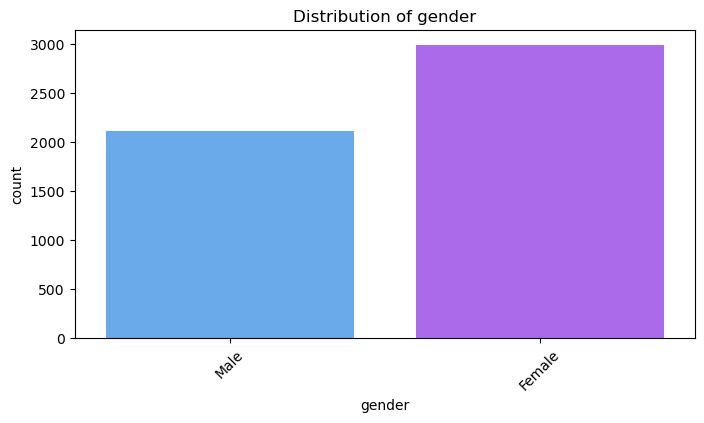

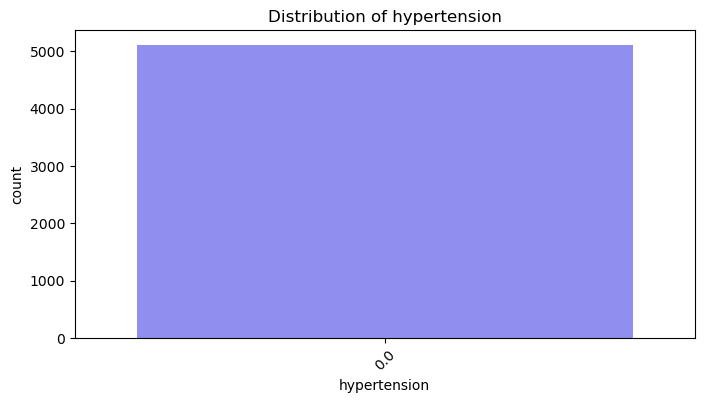

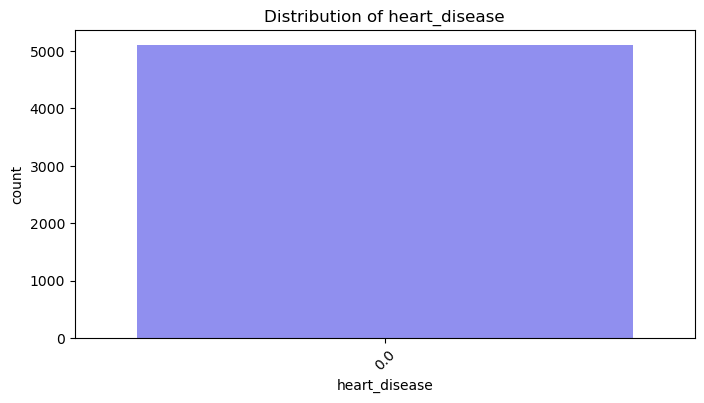

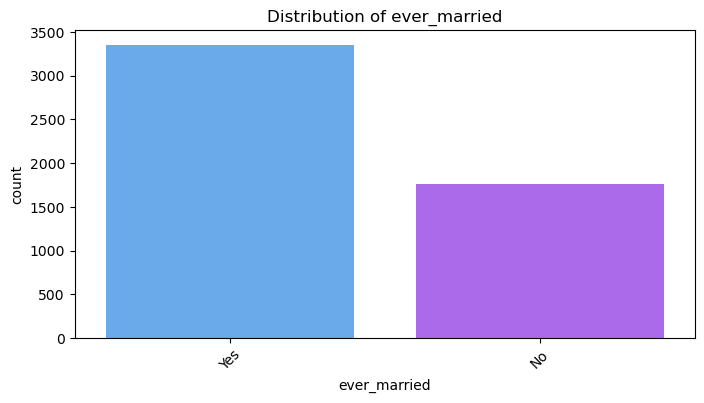

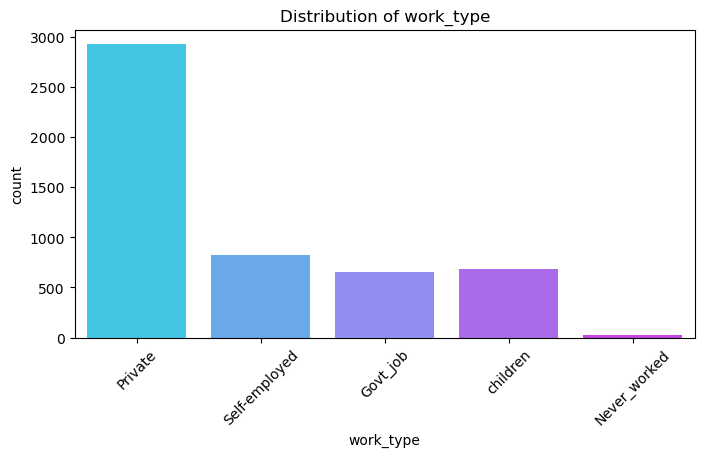

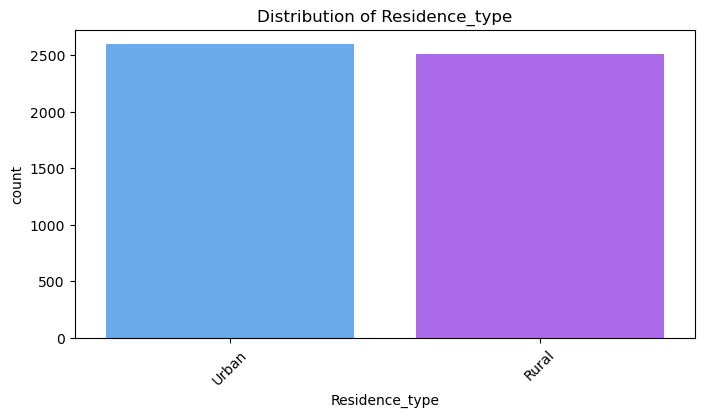

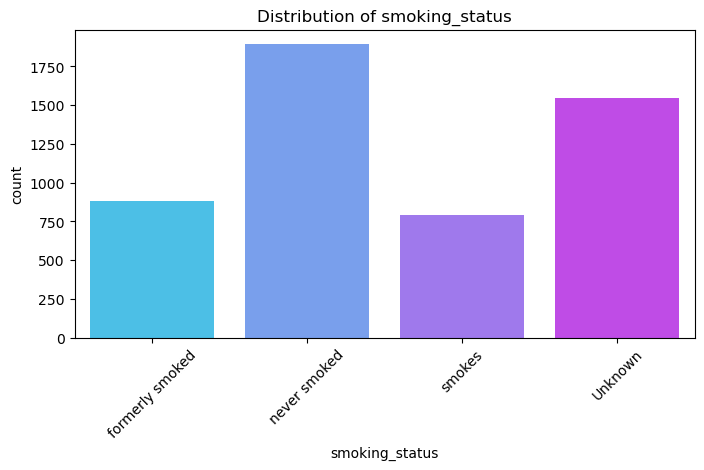

In [298]:
# Categorical variable analysis
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=stroke_data, x=feature, palette='cool')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

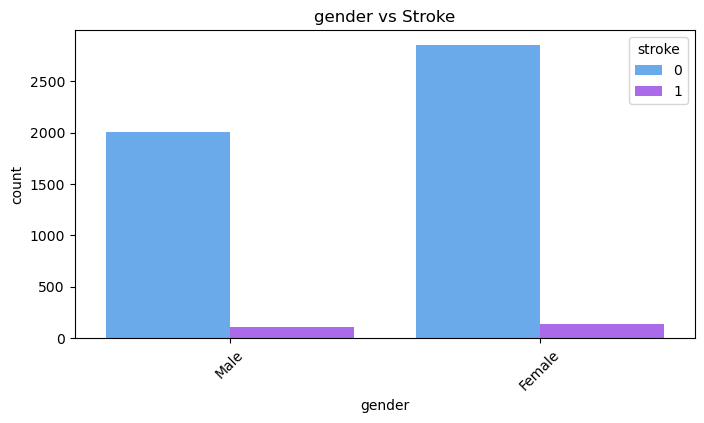

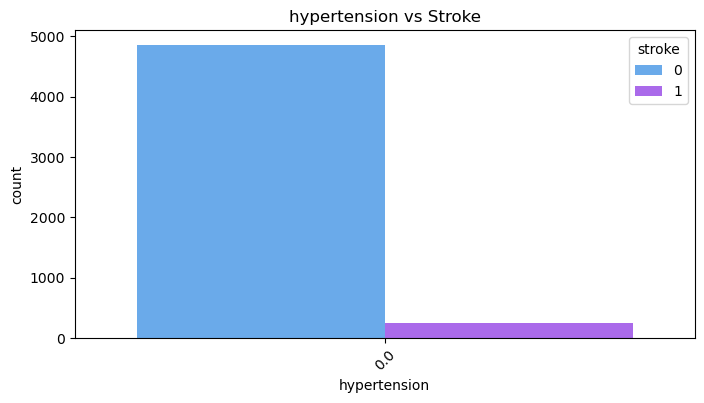

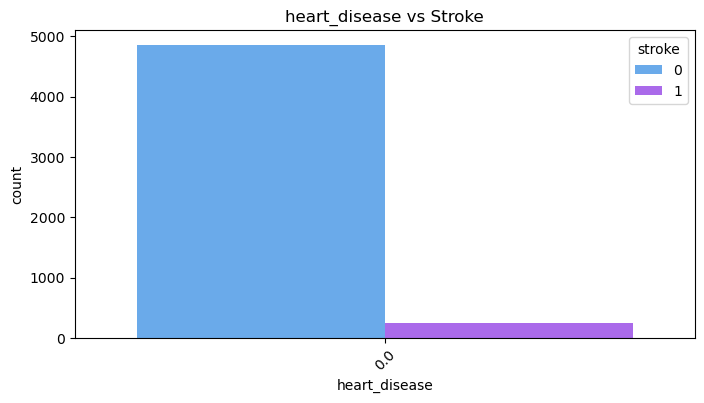

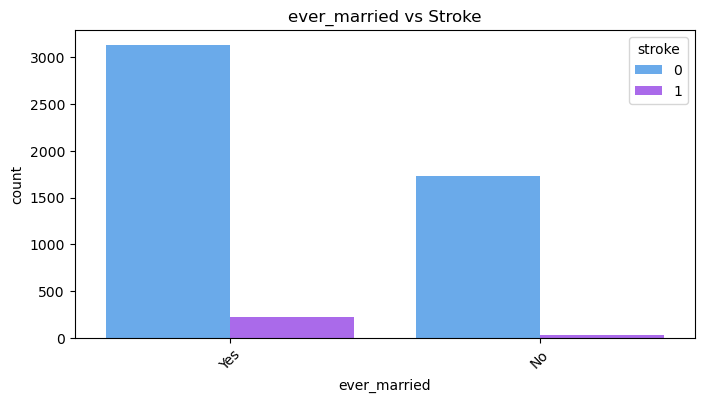

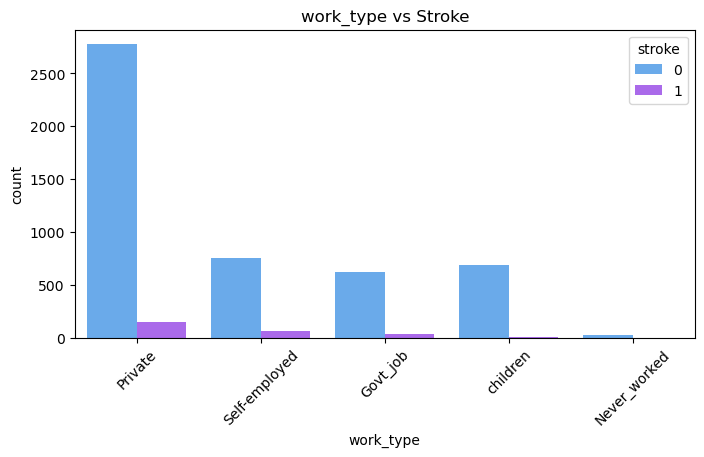

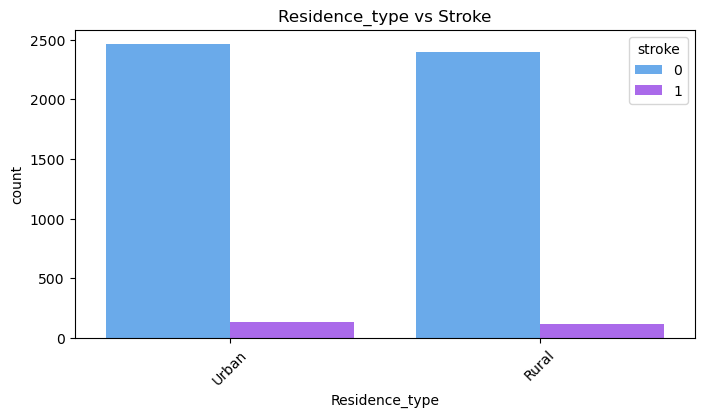

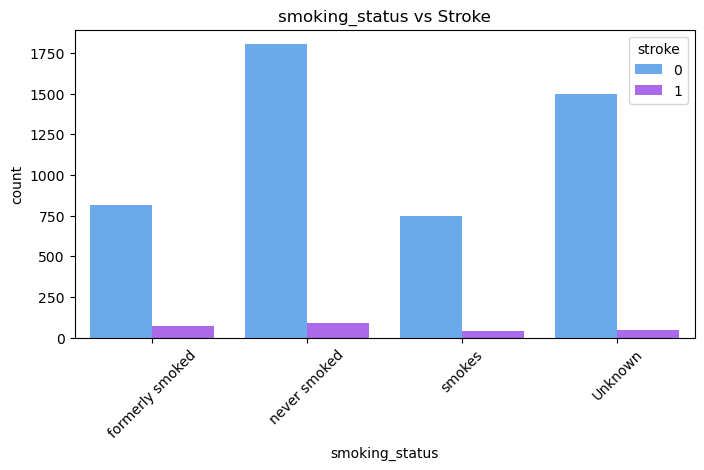

In [299]:
# Analyze categorical variables vs stroke
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=stroke_data, x=feature, hue='stroke', palette='cool')
    plt.title(f'{feature} vs Stroke')
    plt.xticks(rotation=45)
    plt.show()


In [300]:
# Drop 'id' column since it’s not a useful feature
stroke_data = stroke_data.drop(columns=['id'])

### Encoding

In [302]:
# Encode categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
ordinal_features = ['gender','ever_married']

In [303]:
from sklearn.preprocessing import OrdinalEncoder

In [304]:
# Apply OrdinalEncoding for ordinal categories
ordinal_encoder = OrdinalEncoder(
)
stroke_data[ordinal_features] = ordinal_encoder.fit_transform(stroke_data[ordinal_features])


In [305]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,0.0,1.0,Private,Urban,118.7645,36.6,formerly smoked,1
1,0.0,61.0,0.0,0.0,1.0,Self-employed,Rural,118.7645,28.1,never smoked,1
2,1.0,80.0,0.0,0.0,1.0,Private,Rural,105.9200,32.5,never smoked,1
3,0.0,49.0,0.0,0.0,1.0,Private,Urban,118.7645,34.4,smokes,1
4,0.0,79.0,0.0,0.0,1.0,Self-employed,Rural,118.7645,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,0.0,0.0,1.0,Private,Urban,83.7500,28.1,never smoked,0
5106,0.0,81.0,0.0,0.0,1.0,Self-employed,Urban,118.7645,40.0,never smoked,0
5107,0.0,35.0,0.0,0.0,1.0,Self-employed,Rural,82.9900,30.6,never smoked,0
5108,1.0,51.0,0.0,0.0,1.0,Private,Rural,118.7645,25.6,formerly smoked,0


In [306]:
from sklearn.preprocessing import OneHotEncoder

In [307]:
stroke_data = pd.get_dummies(stroke_data, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [308]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0.0,0.0,1.0,118.7645,36.6,1,False,True,False,False,True,True,False,False
1,0.0,61.0,0.0,0.0,1.0,118.7645,28.1,1,False,False,True,False,False,False,True,False
2,1.0,80.0,0.0,0.0,1.0,105.9200,32.5,1,False,True,False,False,False,False,True,False
3,0.0,49.0,0.0,0.0,1.0,118.7645,34.4,1,False,True,False,False,True,False,False,True
4,0.0,79.0,0.0,0.0,1.0,118.7645,24.0,1,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,0.0,0.0,1.0,83.7500,28.1,0,False,True,False,False,True,False,True,False
5106,0.0,81.0,0.0,0.0,1.0,118.7645,40.0,0,False,False,True,False,True,False,True,False
5107,0.0,35.0,0.0,0.0,1.0,82.9900,30.6,0,False,False,True,False,False,False,True,False
5108,1.0,51.0,0.0,0.0,1.0,118.7645,25.6,0,False,True,False,False,False,True,False,False


In [309]:
# Split features and target
X = stroke_data.drop(columns=['stroke'])
y = stroke_data['stroke']

In [310]:
from imblearn.over_sampling import SMOTE

In [311]:
print(np.unique(y, return_counts=True))

(array([0, 1], dtype=int64), array([4860,  249], dtype=int64))


In [312]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [315]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [316]:
#Define the hyperparameter grid
param_grid = {
     'n_estimators': [100,150,200],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2,6,8],
     'min_samples_leaf': [1,2,3],
     'max_features': [True,False],
     'warm_start': [True,False],
}
# create an instance of RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
#create an instance of RandomizedSearchCV
model = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid)

In [317]:
# Train the model
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': [True, False],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 6, 8],
                                        'n_estimators': [100, 150, 200],
                                        'warm_start': [True, False]})

In [318]:
print("Best parameters found:", model.best_params_)

Best parameters found: {'warm_start': True, 'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': True, 'max_depth': 20}


In [319]:
random_df = model.best_estimator_
random_df

RandomForestClassifier(max_depth=20, max_features=True, min_samples_split=8,
                       n_estimators=200, random_state=42, warm_start=True)

In [320]:
#score on training data
random_df.score(X_train, y_train)

0.9891975308641975

In [321]:
#score on training data
random_df.score(X_test, y_test)

0.9588477366255144

In [322]:
# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [323]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [324]:
from sklearn.metrics import confusion_matrix

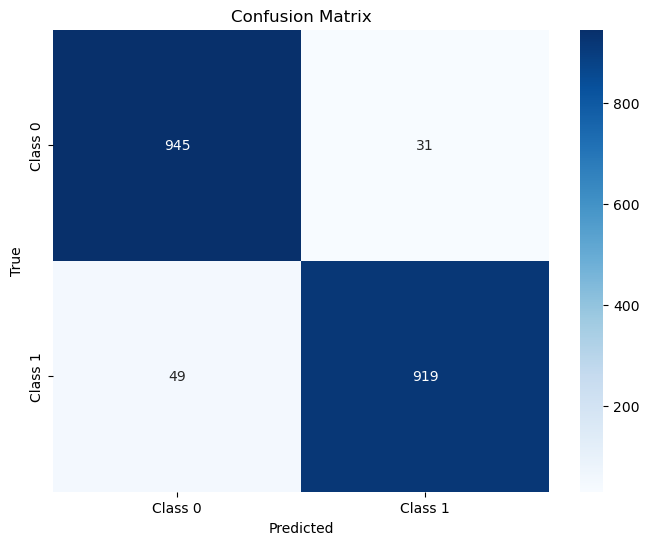

In [325]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Evaluation

In [327]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

In [328]:
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Accuracy', 'F1 Score'],
    'Value': [precision, accuracy, f1]
})
metrics_df

,Metric,Value
0,Precision,0.959002
1,Accuracy,0.958848
2,F1 Score,0.958843


## Deployment

In [330]:
import pickle

In [331]:
# Save the model, encoder, and feature names using pickle
pickle.dump(model, open("stroke_prediction_model.pkl", "wb"))
pickle.dump(ordinal_encoder, open("ordinal_encoder.pkl", "wb"))
pickle.dump(X.columns.tolist(), open("feature_names.pkl", "wb"))